In [16]:
# Basic Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
# Importing the dataset
sleepData = pd.read_csv("../data/SaYoPillow.csv")
sleepData.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Data Preparation and Cleaning
- Converting the body temperature from farenheit to celsius
- Re-categorising the 5 different sleep levels into 4, with 0 to 0, 1 to 1, 2/3 to 2, and 4 to 3

In [3]:
# Converting the body temperature from farenheit to celsius
def convert_to_celsius(x):
    return (x - 32) * 5/9

sleepData["t"] = sleepData["t"].apply(convert_to_celsius)
sleepData.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,33.244444,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,33.084444,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,35.555556,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,32.648889,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,36.595556,6.496,96.248,72.48,8.248,53.12,0


In [4]:
# Re-categorising the 5 different sleep levels into 4, with 0 to 0, 1 to 1, 2/3 to 2, and 4 to 3
sleepData["sl"] = sleepData["sl"].replace([2, 3], 2)
sleepData["sl"] = sleepData["sl"].replace([4], 3)
sleepData.describe()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,33.777778,11.700000,90.900000,88.500000,3.700000,64.500000,1.600000
std,19.372833,3.966111,1.960939,4.299629,3.902483,11.893747,3.054572,9.915277,1.020614
min,45.000000,16.000000,29.444444,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,32.500000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,33.888889,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,35.277778,15.750000,94.250000,98.750000,6.500000,72.500000,2.000000
max,100.000000,30.000000,37.222222,19.000000,97.000000,105.000000,9.000000,85.000000,3.000000


            sr        rr         t        lm        bo       rem      sr.1  \
sr    1.000000  0.976268 -0.902475  0.981078 -0.903140  0.950600 -0.920554   
rr    0.976268  1.000000 -0.889237  0.991738 -0.889210  0.935572 -0.891855   
t    -0.902475 -0.889237  1.000000 -0.896412  0.998108 -0.857299  0.954860   
lm    0.981078  0.991738 -0.896412  1.000000 -0.898527  0.964703 -0.901102   
bo   -0.903140 -0.889210  0.998108 -0.898527  1.000000 -0.862136  0.950189   
rem   0.950600  0.935572 -0.857299  0.964703 -0.862136  1.000000 -0.893952   
sr.1 -0.920554 -0.891855  0.954860 -0.901102  0.950189 -0.893952  1.000000   
hr    0.976268  1.000000 -0.889237  0.991738 -0.889210  0.935572 -0.891855   
sl    0.923974  0.920463 -0.939742  0.931231 -0.940500  0.940621 -0.938125   

            hr        sl  
sr    0.976268  0.923974  
rr    1.000000  0.920463  
t    -0.889237 -0.939742  
lm    0.991738  0.931231  
bo   -0.889210 -0.940500  
rem   0.935572  0.940621  
sr.1 -0.891855 -0.938125  
hr 

<AxesSubplot:>

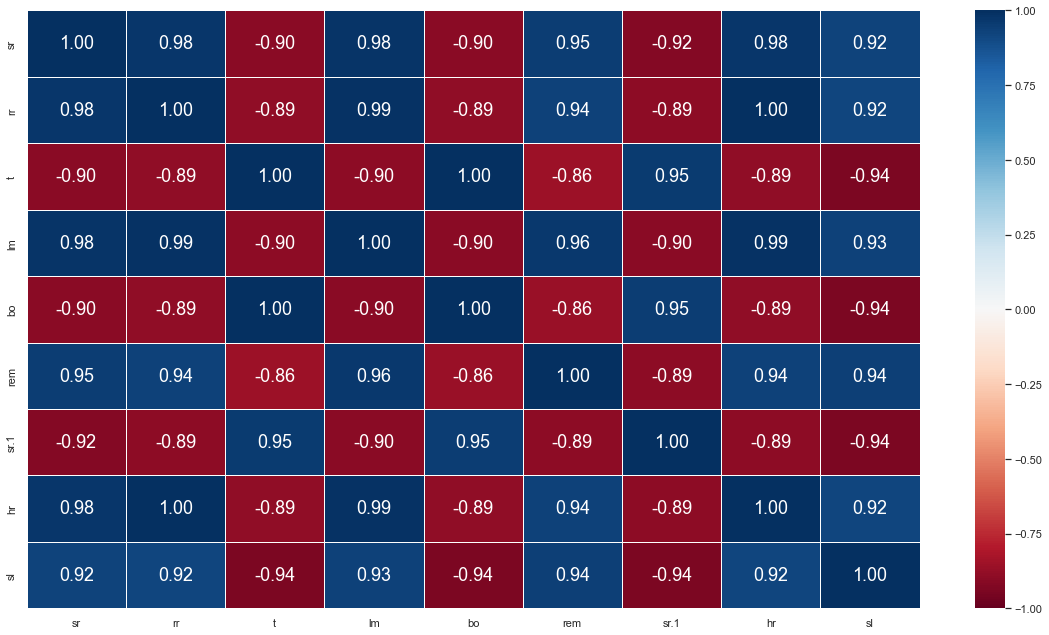

In [5]:
# Correlation Matrix
print(sleepData.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 11))
sns.heatmap(sleepData.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### Predicting variables = "sr", "rr", "t", "lm", "bo", "rem", "sr.1", "hr"

### Variable to predict = "sl"

### From the above heatmap, we can see that the correlation between each variables in the predicting variables have very high correlation, which means each factor is important in predicting another factor

### However, all the predicting variables have about the same correlation in relation to the variable to predict, from 0.92 to 0.94

### Therefore, there is no one factor that affects "Stress" the most, and all the other variables have about the same importance in predicting "Stress"

# Sub-topic 1: How can we use the stress level predicted from emotions, to predict sleep quality

### Since we have stress level predicted using emotions from the other dataset, we can that stress level to predict sleep quality, using variables that indicate quality of sleep (Eye Movement ("rem"), Sleeping Hours ("sr.l"))
### We first did linear regression on the dataset, using "Stress Level (sl)" to predict "Eye Movement (rem)" and "Sleeping Hours (sr.1)"

----- Predicting for "rem" below using Stress Level "sl": -----
Intercept of Regression 	: b =  [71.00465523]
Coefficients of Regression 	: a =  [[10.93711698]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8867054094923797
Mean Squared Error (MSE) 	: 15.92938259284581

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.875741169065645
Mean Squared Error (MSE) 	: 17.66129368524321



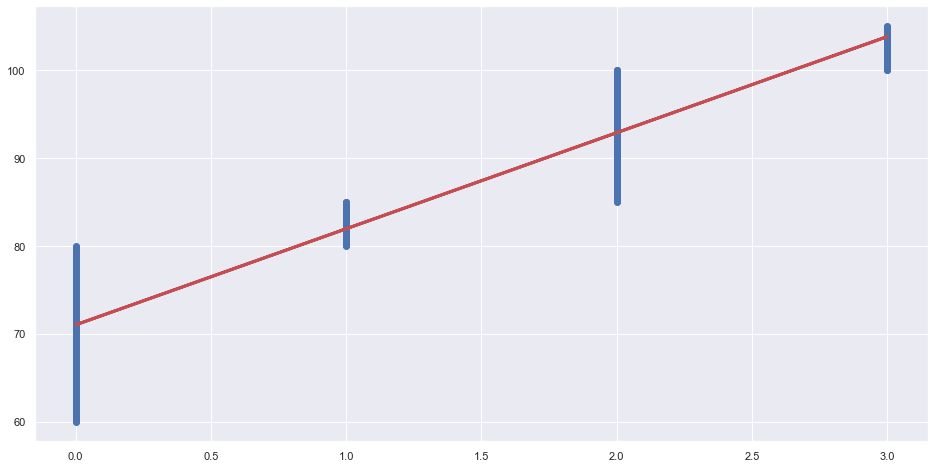

----- Predicting for "sr.1" below using Stress Level "sl": -----
Intercept of Regression 	: b =  [8.18913343]
Coefficients of Regression 	: a =  [[-2.80804445]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8806708211112496
Mean Squared Error (MSE) 	: 1.113536390734854

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8763376567425785
Mean Squared Error (MSE) 	: 1.1316172412008507



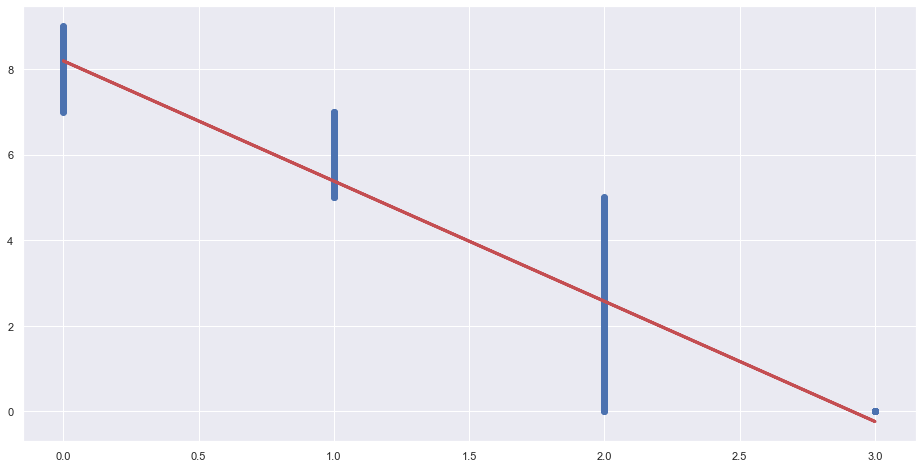

In [6]:
# Using Stress Level "sl", to predict variables that indicate quality of sleep (Eye Movement ("rem"),
# Sleeping Hours ("sr.l"))

predictingFactors1 = ["rem", "sr.1"]

y = pd.DataFrame(sleepData[predictingFactors1])
X = pd.DataFrame(sleepData[["sl"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
for i in predictingFactors1:
    print("----- Predicting for \"{}\" below using Stress Level \"sl\": -----".format(i))

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, pd.DataFrame(y_train[i]))        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

    # Predict the Total values from Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, pd.DataFrame(y_train[i])))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(pd.DataFrame(y_train[i]), y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, pd.DataFrame(y_test[i])))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(pd.DataFrame(y_test[i]), y_test_pred))
    print()
    
    # Visualising the data
    # Formula for the Regression line
    regline_x = np.array(X)
    regline_y = linreg.intercept_ + linreg.coef_ * np.array(X)

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(X, pd.DataFrame(y[i]))
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()

### From the high Explained Variance (R^2) and low Mean Squared Error (MSE), we can tell that it is a good model of linear regression
### Thus, with the coefficients of the linear regression model, we can now link both datasets and models together, using the common data of "Stress Level", to predict sleep quality using emotions

# Sub-topic 2: How can we use numeric sleeping data to predict stress level if emotions are unavailable

In [7]:
predictingFactors2 = ["sr", "rr", "lm", "rem", "sl"]

# Predicting factors with body temp (t), sleep hours (sr), blood oxygen (bo), heart rate (hr)
y = pd.DataFrame(sleepData[predictingFactors2])
X = pd.DataFrame(sleepData[["sr.1", "t", "bo", "hr"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    
for i in predictingFactors2:
    print("-----Predicting for {}-----".format(i))

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, pd.DataFrame(y_train[i]))        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

    # Predict the Total values from Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, pd.DataFrame(y_train[i])))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(pd.DataFrame(y_train[i]), y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, pd.DataFrame(y_test[i])))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(pd.DataFrame(y_test[i]), y_test_pred))
    print()

-----Predicting for sr-----
Intercept of Regression 	: b =  [23.57183455]
Coefficients of Regression 	: a =  [[-1.93434329  6.30302409 -2.7989817   1.49944784]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9658787127250028
Mean Squared Error (MSE) 	: 12.838776466307511

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9693599590371008
Mean Squared Error (MSE) 	: 11.277897474648498

-----Predicting for rr-----
Intercept of Regression 	: b =  [-4.]
Coefficients of Regression 	: a =  [[ 1.38473395e-15 -2.05391260e-15  3.88578059e-16  4.00000000e-01]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 4.552854367275554e-29

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 4.2673618491955686e-29

-----Predicting for lm-----
Intercept of Regression 	: b =  [6.10689818]
Coefficients of Regression 	: a =  [[-0.15179243  1.66803172 -0.8303107   0.3918

### If the user are able to get all 8 data for sleeping quality, can predict stress level directly

In [8]:
# Predicting stress level (sl) with all 8 variables

y = pd.DataFrame(sleepData["sl"])
X = pd.DataFrame(sleepData[["sr", "rr", "t", "lm", "bo", "rem", "sr.1", "hr"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Intercept of Regression 	: b =  [2.33647774]
Coefficients of Regression 	: a =  [[-0.01698753  0.04838559 -0.32591277 -0.4151656  -0.01392825  0.09782643
   0.02554888  0.12096398]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9705576987874589
Mean Squared Error (MSE) 	: 0.031044603319346047

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9672146391324975
Mean Squared Error (MSE) 	: 0.032190615092128345



In [15]:
## Testing classification accuracy through rounding
rounded = pd.DataFrame(data=np.round_(y_test_pred))
rounded

,0
0,0.0
1,3.0
2,1.0
3,3.0
4,1.0
...,...
121,2.0
122,3.0
123,3.0
124,-0.0


In [13]:
y_test

,sl
396,0
545,3
391,1
440,3
5,1
...,...
546,2
192,3
575,3
273,0


<AxesSubplot:>

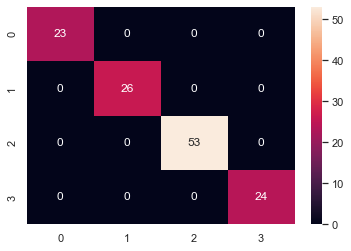

In [18]:
sns.heatmap(confusion_matrix(y_test, rounded), annot=True)